In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mass import MassSpectrum
from mass import VanKrevelen
from brutto_generator import brutto_gen

#### Generate brutto formulas exactly as in transhumus

In [31]:
gdf = brutto_gen(elems={'C':(1,61),'H':(0,121), 'O':(0,31),'N':(0,1),"S":(0,1)})

#### Loading and assign brutto formules by this lib

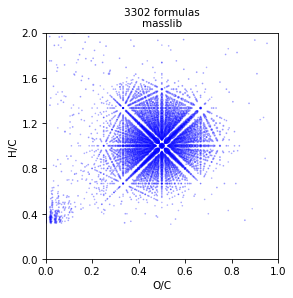

In [32]:
spec = MassSpectrum().load(filename="data/fa_th.csv",
                            mapper={'mw':'mass', "relativeAbundance":'I'},
                            take_columns=['mass','I'],
                            sep=',',
                            treshold=0
                            )
spec = spec.assign(generated_bruttos_table=gdf, elems='CHONS', rel_error=1)
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
vk = VanKrevelen(spec.table, name='masslib')
vk.draw_scatter(ax=ax)

#### Load assigned mass-list calculated in transhumus

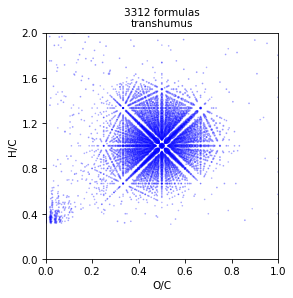

In [33]:
mapper = {"mw": "mass", "relativeAbundance": "I"}
transhumus = MassSpectrum().load("data/fa_th.csv",
                            mapper = mapper,
                            sep=',',
                            ignore_columns=["peakNo", "errorPPM", "DBE", "class", "z"]
                           )
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
vk = VanKrevelen(transhumus.table, name='transhumus')
vk.draw_scatter(ax=ax)

#### Search for common formulas in two methods

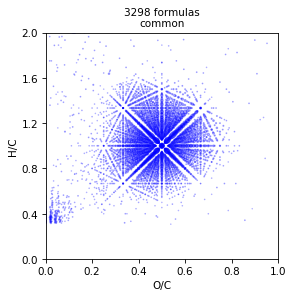

In [34]:
common = spec & transhumus
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
vk = VanKrevelen(common.table, 'common')
vk.draw_scatter(ax=ax)

#### Search for the symmetric difference between the two methods

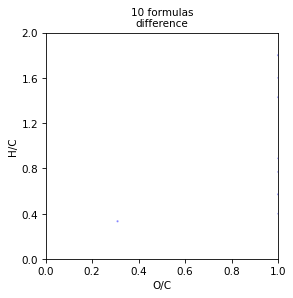

In [35]:
common = spec ^ transhumus
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
vk = VanKrevelen(common.table, 'difference')
vk.draw_scatter(ax=ax)